# Some Scikit-Learn Problems #

### Problem 1: SKLearn's circle dataset ###

The following code uses the sklearn [circle data set generator](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) to produce a data set with a certain distribution.

In [1]:
from sklearn.datasets import make_circles
circX, circy = make_circles(200, factor=0.3, noise=0.25)

+ Produce a plot of the data; use logistic regression to make a model for predicting the category circy as a function of the coordinates circX. **Then** use the same code above to produce a test data set and find the accuracy score of the model

+ Do the same problem with an SVM classifier.  (Note the default kernel function for SVC is a *radial basis function*.  See the next problem.)


## Problem Solution ##

### Part A ###

In [2]:
circX[:5]

array([[ 0.32611642, -0.08223951],
       [ 0.76420443,  0.09056766],
       [ 0.6067489 , -0.47475193],
       [-0.33382471, -0.7728768 ],
       [-0.06879764, -0.58915468]])

In [3]:
circy[:5]

array([1, 0, 0, 0, 1])

In [4]:
import matplotlib.pyplot as plt

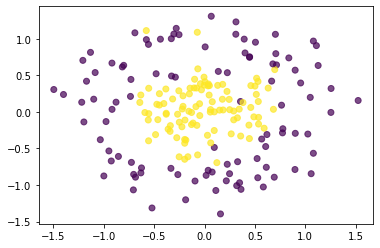

In [9]:
plt.scatter(circX[:,0], circX[:,1], c=circy, alpha = 0.7)
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
mylogit = LogisticRegression()

In [12]:
mymodel1 = mylogit.fit(circX, circy)

In [14]:
from sklearn.datasets import make_circles
testX, testy = make_circles(200, factor=0.3, noise=0.25)

In [16]:
# This is pretty horrible, and that's the point
accuracy_score(mymodel1.predict(testX), testy)  

0.515

### Parts B ##

In [17]:
from sklearn.svm import SVC

In [18]:
mysvc = SVC()

In [19]:
mymodel2 = mysvc.fit(circX, circy)

In [20]:
accuracy_score(mymodel2.predict(testX), testy)  

0.875

### Problem 2: Plotting Decision Boundaries ###

1. This problem will use the SKLearn [DisplayDecisionBoundary](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) command to visualize the regions in the plane that SKLearn classifiers will assign to each category.  It assumes you have watched the [decisionboundary.mp4](https://drive.google.com/drive/folders/1-Cjrkh8PO8rpZSraG2HWOMk_22FTMHY4id0ZjvB2Kv_VAP3LLFD3e4f6nu8QvAptSTGOSH11) video for an introduction to the command.  It will also make use of the 01-25prob1.csv data file on [the class github page](https://github.com/aleahy-work/CS-STAT323-W24).

   The problem will look at different kernel functions used in SVC to get a sense of their capabilities. These kernels $K({\bf x}_i, {\bf x}_j) = \Phi({\bf x}_i) \cdot \Phi({\bf x}_j)$ are incorporated into function to be optimized:

$
  L_p = \sum_{N_s} \alpha_i y_i \Phi({\bf x}_i) \cdot \Phi({\bf x}_j) + b
$
    

   
   and can dramatically impact the shape of the decision boundary. There are [several different kernel functions](https://scikit-learn.org/stable/modules/svm.html#kernel-functions) supported by the [SKLearn SVC class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), most of which depend on various parameters.  Our goal is to find an appropriate kernel function for the data. 

+ Produce a scatter plot of the data and determine whether a linear classifier (such as perceptron or adaline is appropriate).

+ The simplest kernel function is the **linear** kernel function (which is the original dot product): ${\bf x}_1 \cdot {\bf x}_2$.  This is the 'trivial' kernel function, which means it doesn't change anything.  **However**, it is not the default in the SVC class.  It has to be specified with the kernel= parameter.  See the SVC link above for how to do this, and produce a plot showing (1) the decision boundary and (2) plot of the data, immitating the video linked above.

+ Another kernel is the **polynomial** kernel $({\bf x}_1 \cdot {\bf x}_2 + r)^d$, which depends on the parameters r and d.  Play around with these parameters to find a model that seems suitable for your data and produce a plot of the decision boundaries.  See the coef0 and degree parameters in the [SVC class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). 

+ One of the most important kernels is the **radial basis kernel** $exp(- \|{\bf x_1} - {\bf x_2}\|^2)$.  Produce a plot of the decision boundaries for this kernel together with our datasets.

+ *Regularization* is used to improve many machine learning models. Essentially, it modifies the loss function to make the decision boundaries smoother to avoid overfitting.  In the SVC class, the regularization parameter is given by C and defaults to $C = 1$.  (See the documentation page for details.)  Try different values of C with your radial basis model to find a value of C which gives the best fit to your train data.

## Problem 2 Solution ##

### Part A ###

In [22]:
import numpy as np

In [28]:
mydata = np.genfromtxt('https://raw.githubusercontent.com/aleahy-work/CS-STAT323-W24/main/Assns/01-25prob1.csv', delimiter=',')

In [24]:
mydata[:5]

array([[ 1.22331584,  0.35924235,  0.        ],
       [-0.03424518, -0.13203105,  1.        ],
       [-0.43856672,  0.89295088,  0.        ],
       [-0.31131126,  0.72196398,  0.        ],
       [ 1.75561176,  0.0846839 ,  1.        ]])

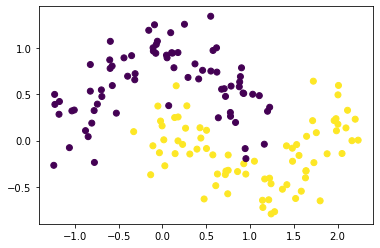

In [26]:
plt.scatter(mydata[:,0], mydata[:,1], c = mydata[:,2])
plt.show()

**Point:** A linear classifier will also generate a linear decision boundary separating purple and gold, so it is not appropriate. 

### Parts B through E ###

In [34]:
from sklearn.inspection import DecisionBoundaryDisplay

In [35]:
myX = mydata[:,0:2]
myy = mydata[:,2]

In [36]:
myX[:5]

array([[ 1.22331584,  0.35924235],
       [-0.03424518, -0.13203105],
       [-0.43856672,  0.89295088],
       [-0.31131126,  0.72196398],
       [ 1.75561176,  0.0846839 ]])

In [37]:
myy[:5]

array([0., 1., 0., 0., 1.])

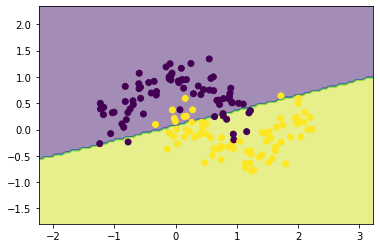

In [38]:
from sklearn.svm import SVC
cmod2 = SVC(kernel='linear')
mymod2 = cmod2.fit(myX, myy)
disp2 = DecisionBoundaryDisplay.from_estimator(mymod2, myX, response_method="predict", alpha=0.5)
disp2.ax_.scatter(myX[:,0], myX[:,1], c= myy)
plt.show()

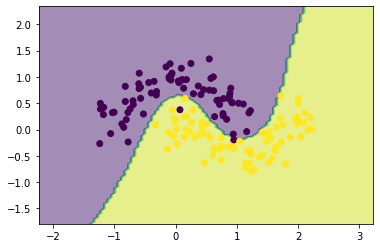

In [44]:
from sklearn.svm import SVC
cmod2 = SVC(kernel='poly', degree=5, coef0 = 3)
mymod2 = cmod2.fit(myX, myy)
disp2 = DecisionBoundaryDisplay.from_estimator(mymod2, myX, response_method="predict", alpha=0.5)
disp2.ax_.scatter(myX[:,0], myX[:,1], c= myy)
plt.show()

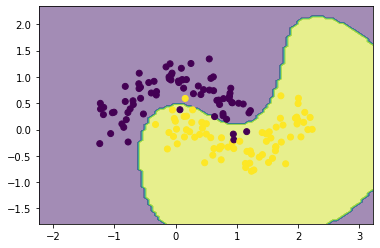

In [45]:
from sklearn.svm import SVC
cmod2 = SVC()  # default is Radial Basis Function
mymod2 = cmod2.fit(myX, myy)
disp2 = DecisionBoundaryDisplay.from_estimator(mymod2, myX, response_method="predict", alpha=0.5)
disp2.ax_.scatter(myX[:,0], myX[:,1], c= myy)
plt.show()

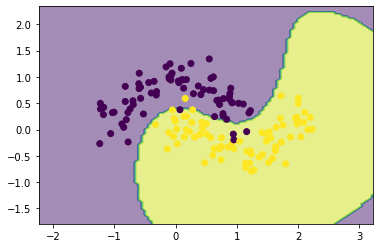

In [48]:
from sklearn.svm import SVC
cmod2 = SVC(C = .5)  # default is Radial Basis Function
mymod2 = cmod2.fit(myX, myy)
disp2 = DecisionBoundaryDisplay.from_estimator(mymod2, myX, response_method="predict", alpha=0.5)
disp2.ax_.scatter(myX[:,0], myX[:,1], c= myy)
plt.show()

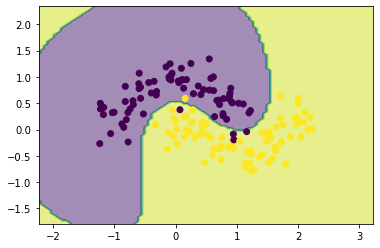

In [49]:
from sklearn.svm import SVC
cmod2 = SVC(C = 3)  # default is Radial Basis Function
mymod2 = cmod2.fit(myX, myy)
disp2 = DecisionBoundaryDisplay.from_estimator(mymod2, myX, response_method="predict", alpha=0.5)
disp2.ax_.scatter(myX[:,0], myX[:,1], c= myy)
plt.show()

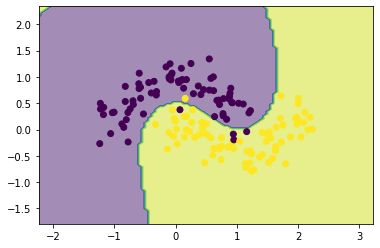

In [47]:
from sklearn.svm import SVC
cmod2 = SVC(C = 2)  # default is Radial Basis Function
mymod2 = cmod2.fit(myX, myy)
disp2 = DecisionBoundaryDisplay.from_estimator(mymod2, myX, response_method="predict", alpha=0.5)
disp2.ax_.scatter(myX[:,0], myX[:,1], c= myy)
plt.show()

**This** one appears to be the best in my estimation

### Problem 3: Fashion MNIST ### 

The [fashionMNIST database](https://github.com/zalandoresearch/fashion-mnist/tree/master) is a collection of 70,000 28x28 black and white images of ten different categories of items of clothing taken from an online catalog.  The categories (and their numerical label are given below: 

| Label | Description |
| --- | ----|
|0 | T-shirt/top |
| 1 | Trouser |
| 2	| Pullover |
| 3	| Dress |
| 4	| Coat | 
| 5	| Sandal | 
| 6	| Shirt | 
| 7	| Sneaker | 
| 8	| Bag | 
| 9 | Ankle boot |

Your goal in this problem is to develop a model which classifies these items.  

**Download the dataset**.  This is a multi-step process.  The [data itself](https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion) is available on Github.  There are four files, divided into train ("train") vs test ("t10k") and into images ("images") and labels ("labels").  For instance, t10k-images-idx3-ubyte.gz refers to the 10,000 test images and t10k-labels-idx1-ubyte.gz references to the corresponding labels.  You will need to

+ Download each of these files (which are gzipped) into a directory that you can access through Jupyter.  Then load the following python load_mnist() function (evaluate the cell) and load the **train** data using the function call in the next cell.   Verify the data is loaded using the ".shape" attribute for your images and your labels. What do the dimensions mean?

In [1]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [3]:
""" 
Assuming you downloaded the data to a folder called fashion-mnist, which is a
subfolder of the folder you are currently working with, you can load
the 'train' images and classes with the following function call.
"""
myX, myy = load_mnist('fashion-mnist','train')

+ Produce an image of the 10th item in the train image dataset. (Remember to count from zero.)  What category does the data belong to (number and name)?  **Note:** Each image is in a linear array (not a 2-dimensional array--as images are supposed to be.  You will need to reshape the data for the image, **but** it shouldn't be reshaped permanently, because the model will expect each image to be a linear array. 

+ In the following you will be comparing the 'shirt' category to the 'sneaker' category. Create a subset of the train images and labels consisting only of shirts and sneakers.  What are the sizes of the two resulting arrays (images and labels)?  In particular, how many images are contained in this subset?

+ You can produce a random set of integers within a given range using the numpy [randint function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html).  Use this to select a subset of 6 images from the shirts and sneakers dataset.  Produce a plot of all of these 6 images together.  Use the matplotlib [subplots function](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) to arrange these 6 images in a 2 (row) by 3 (column) grid. (See the link for suggestions on how to do this.)

**Warning:** With 60K entries, this dataset is often too big for most of the classification techniques used in SKLearn.  (The model can ".fit" the data, but the timing can be very long for large datasets.)  At the risk of hanging your notebook, don't try this on the full dataset.

+ Write a function sample( X, y, n) that returns newX and newY, a sample of size n from the X (images) and y (labels).  

+ Select a random sample of 50 items from the shirt and sneaker dataset and fit a SVM model for predicting whether something is a shirt or sneaker image. Select another sample of size 50 as a test dataset and determine the accuracy score for this model. 

+ Write a function testmodel( X, y, n) that (1) produces samples of size n for X and y, (2) trains a model on this data, (3) selects a test sample of size n, and (4) returns the accuracy score for the model.  Use it to train the model with samples of size 100, 150, etc, until your systems starts to get slow. 

+ Produce a plot showing accuracy as a function of sample size. 

## Problem 3 Solution ##

### Part A ###

In [50]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [51]:
""" 
Assuming you downloaded the data to a folder called fashion-mnist, which is a
subfolder of the folder you are currently working with, you can load
the 'train' images and classes with the following function call.
"""
myX, myy = load_mnist('fashion-mnist','train')

In [53]:
myX.shape

(60000, 784)

In [54]:
myy.shape

(60000,)

### Part B ###

In [52]:
myX[9].shape

(784,)

In [56]:
myy[9]  # This is the category of sandals

5

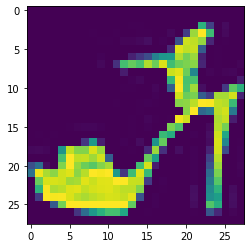

In [58]:
plt.imshow(myX[9].reshape(28,28))
plt.show()  # This looks like a sandal

### Part C ###

In [60]:
myshirtX = myX[myy == 6]

In [61]:
myshirtX.shape

(6000, 784)

In [63]:
myshirty.shape

(6000,)

In [64]:
mysneakX = myX[myy == 7]
mysneaky = myy[myy == 7]

In [71]:
mydataX = np.vstack((myshirtX, mysneakX))
mydatay = np.hstack((myshirty, mysneaky))

In [72]:
mydataX.shape

(12000, 784)

In [73]:
mydatay.shape

(12000,)

In [108]:
len(mydatay[mydatay ==6])

6000

There are 12000 images in this subset.

### Part D ###

In [75]:
randoms = np.random.randint(0,12000,6)

In [76]:
mysampleX = mydataX[randoms]

In [77]:
mysampleX.shape

(6, 784)

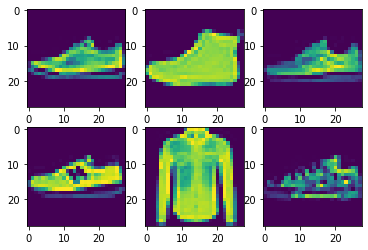

In [82]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(mysampleX[0].reshape(28,28))
axs[0, 1].imshow(mysampleX[1].reshape(28,28))
axs[0, 2].imshow(mysampleX[2].reshape(28,28))
axs[1, 0].imshow(mysampleX[3].reshape(28,28))
axs[1, 1].imshow(mysampleX[4].reshape(28,28))
axs[1, 2].imshow(mysampleX[5].reshape(28,28))
plt.show()

In [85]:
def sample(X, y, n):
    randoms = np.random.randint(0,12000,n)
    return mydataX[randoms], mydatay[randoms]

In [89]:
newX, newy = sample(mydataX, mydatay, 50)

In [91]:
newX.shape

(50, 784)

In [92]:
newy.shape

(50,)

### Part E ###

In [96]:
mysvc2 = SVC(kernel='linear')

In [97]:
mymodel3 = mysvc2.fit(newX, newy)

In [98]:
newtX, newty = sample(mydataX, mydatay, 50)

In [99]:
accuracy_score(mymodel3.predict(newtX), newty)

1.0

### Part F ###

In [102]:
def testmodel(X, y, n):
    newX, newy = sample(X, y, n)
    mymodel = mysvc2.fit(newX, newy)
    newtX, newty = sample(X, y, n)
    print('Accuracy Score is: ', accuracy_score(mymodel.predict(newtX), newty))

In [104]:
testmodel(mydataX, mydatay, 10)

Accuracy Score is:  1.0


# Overview of Scikit-Learn #

The [main page](https://scikit-learn.org/stable/index.html) is a great place to start, and leads to the [supervised learning page](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).  See also the [User Guide page](https://scikit-learn.org/stable/user_guide.html), which has a great list of major categories.  The [API Reference](https://scikit-learn.org/stable/modules/classes.html) is not as organized.

**Datasets:**

+ For playing, SKLearn has many [built-in datasets](https://scikit-learn.org/stable/datasets.html), toy, real-world, and generated.
+ You can also [generate your own datasets](https://scikit-learn.org/stable/datasets/sample_generators.html)

**Classification Techniques:**

  Note the familiar classifiers:

+ [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)
+ [SVM Classifier](https://scikit-learn.org/stable/modules/svm.html#classification)
+ [k Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
+ [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
+ [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
+ [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)


**Other Features:**

+ [Visualizations](https://scikit-learn.org/stable/visualizations.html#visualizations)--devoted to different ways of visualizing models and outcomes
+ [Decision Boundary Display](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay)--an example of the previous
+ [Feature Extracting](https://scikit-learn.org/stable/modules/feature_extraction.html)--this section has a part devoted to text and another part devoted to image features (the second of which isn't so interesting). 
+ [Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)--measuring success of the model

# SVM Examples #

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Train Data Construction ##

In [38]:
first = np.random.multivariate_normal([1.8,1.8],[[1,0],[0,1]], 30)
second = np.random.multivariate_normal([-1.8,-1.8],[[1,0],[0,1]], 70)

In [39]:
num1 = np.append(first, np.ones([30,1],dtype=int), axis=1)
num0 = np.append(second,np.zeros([70,1],dtype=int), axis=1)

In [40]:
traindata = np.vstack((num1,num0))

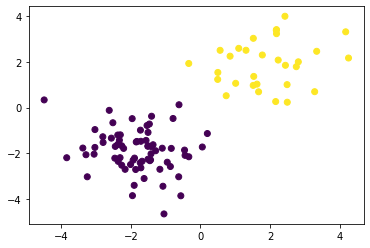

In [42]:
plt.scatter(traindata[:,0], traindata[:,1], c = traindata[:,2])
plt.savefig("myscatter.png", format="png")
plt.show()

## A close-up of the data boundary ##

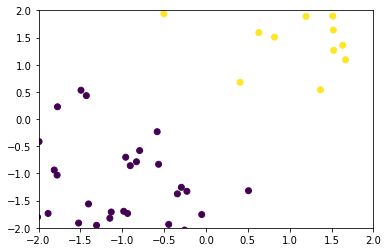

In [43]:
plt.scatter(mydata[:,0], mydata[:,1], c = mydata[:,2])
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.savefig("myscatter2.png", format="png")
plt.show()

In [44]:
traindata[:5,:]

array([[2.81361959, 1.99622811, 1.        ],
       [3.2834958 , 0.69371363, 1.        ],
       [0.85131006, 2.2420503 , 1.        ],
       [1.67120659, 0.68869411, 1.        ],
       [2.49610535, 0.23438094, 1.        ]])

In [47]:
traindata.shape

(100, 3)

In [56]:
trainX = traindata[:,0:2]

In [57]:
trainy = traindata[:,2]

## Test Data Construction ##

**Idea:**  Sophisticated models can *overfit* the data sets they are trained on.  We compare with a test data set to see how it performs on *new* data drawn from the same distribution.

In [49]:
first = np.random.multivariate_normal([1.8,1.8],[[1,0],[0,1]], 30)
second = np.random.multivariate_normal([-1.8,-1.8],[[1,0],[0,1]], 70)

In [50]:
num1 = np.append(first, np.ones([30,1],dtype=int), axis=1)
num0 = np.append(second,np.zeros([70,1],dtype=int), axis=1)

In [51]:
testdata = np.vstack((num1,num0))

In [59]:
testX = testdata[:,0:2]

In [60]:
testy = testdata[:,2]

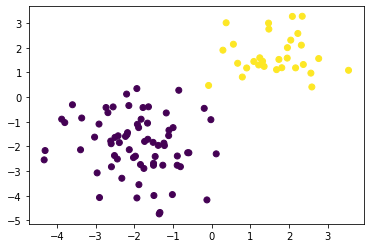

In [61]:
plt.scatter(testdata[:,0], testdata[:,1], c = testdata[:,2])
plt.savefig("myscatter.png", format="png")
plt.show()

## The SVM Model ##

In [53]:
from sklearn.svm import SVC

In [64]:
mysvc1 = SVC()

In [65]:
mymodel1 = mysvc1.fit(trainX, trainy)

In [68]:
model1out = mymodel1.predict(testX)

In [69]:
model1out - testy

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Built-in Accuracy Measurement ##

In [21]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(model1out, testy)

1.0

## Some Interesting Datasets ##

sklearn has methods for generating interesting datasets.  See the "Samples Generator" of the [datasets section](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) of the SKLearn documentation. 

In [2]:
from sklearn.datasets import make_moons

In [3]:
myX, myy = make_moons(100)

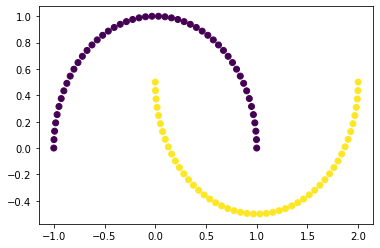

In [4]:
plt.scatter(x = myX[:,0], y = myX[:,1], c = myy)
plt.show()

In [16]:
myX, myy = make_moons(150, noise=.2)

In [69]:
temp = np.hstack((myX, tempy))

In [70]:
temp[:5,:]

array([[ 1.22331584,  0.35924235,  0.        ],
       [-0.03424518, -0.13203105,  1.        ],
       [-0.43856672,  0.89295088,  0.        ],
       [-0.31131126,  0.72196398,  0.        ],
       [ 1.75561176,  0.0846839 ,  1.        ]])

In [65]:
numpy

(150, 2)

In [68]:
tempy = myy.reshape(150,1)

In [62]:
temp[:5]

array([ 1.22331584,  0.35924235, -0.03424518, -0.13203105, -0.43856672])

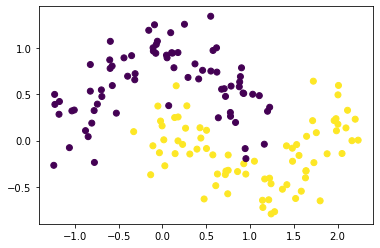

In [71]:
plt.scatter(x = myX[:,0], y = myX[:,1], c = myy)
plt.show()

In [72]:
temp = np.hstack((myX, myy.reshape(150,1)))

In [73]:
temp[:5,:]

array([[ 1.22331584,  0.35924235,  0.        ],
       [-0.03424518, -0.13203105,  1.        ],
       [-0.43856672,  0.89295088,  0.        ],
       [-0.31131126,  0.72196398,  0.        ],
       [ 1.75561176,  0.0846839 ,  1.        ]])

In [74]:
np.savetxt("01-25prob1.csv", temp, delimiter=",")

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

In [32]:
cmod1 = Perceptron()

In [33]:
mymod1 = cmod1.fit(myX, myy)

In [34]:
pred = mymod1.predict(myX)

In [36]:
pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [37]:
accuracy_score(pred, myy)

0.8733333333333333

In [38]:
from sklearn.inspection import DecisionBoundaryDisplay

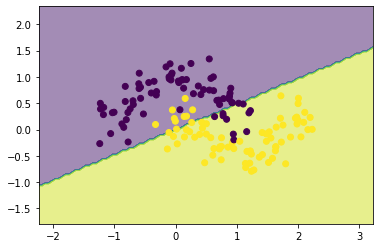

In [43]:
disp = DecisionBoundaryDisplay.from_estimator(mymod1, myX, response_method="predict", alpha=0.5)
disp.ax_.scatter(myX[:,0], myX[:,1], c=myy)
plt.show()

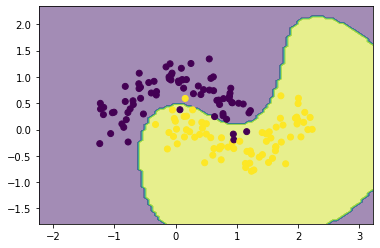

In [52]:
from sklearn.svm import SVC
cmod2 = SVC()
mymod2 = cmod2.fit(myX, myy)
disp2 = DecisionBoundaryDisplay.from_estimator(mymod2, myX, response_method="predict", alpha=0.5)
disp2.ax_.scatter(myX[:,0], myX[:,1], c= myy)
plt.show()

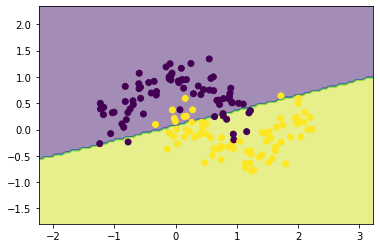

In [53]:
from sklearn.svm import SVC
cmod2 = SVC(kernel='linear')
mymod2 = cmod2.fit(myX, myy)
disp2 = DecisionBoundaryDisplay.from_estimator(mymod2, myX, response_method="predict", alpha=0.5)
disp2.ax_.scatter(myX[:,0], myX[:,1], c= myy)
plt.show()

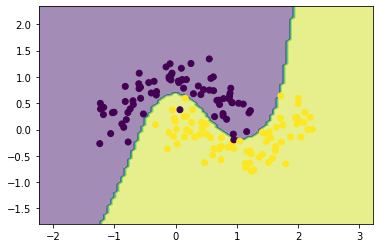

In [56]:
from sklearn.svm import SVC
cmod2 = SVC(kernel='poly', degree=5, coef0 = 2)
mymod2 = cmod2.fit(myX, myy)
disp2 = DecisionBoundaryDisplay.from_estimator(mymod2, myX, response_method="predict", alpha=0.5)
disp2.ax_.scatter(myX[:,0], myX[:,1], c= myy)
plt.show()

### Creating Train and Test Datasets ###

SKLearn has a method for [creating a train-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) in the data.

In [90]:
from sklearn.model_selection import train_test_split

In [94]:
newtrainX, newtestX, newtrainy, newtesty = train_test_split(myX, myy, test_size=.3)

In [96]:
mymodel2 = mysvc1.fit(newtrainX, newtrainy)

In [97]:
predict2 = mymodel2.predict(newtestX)

In [98]:
predict2

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1])

In [99]:
accuracy_score(predict2, newtesty)

0.9777777777777777

## Make Circles ##

Reference page is [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles).

In [5]:
from sklearn.datasets import make_circles

In [6]:
circX, circy = make_circles(200, factor=0.5)

In [7]:
circX[:5,:]

array([[ 4.96057351e-01, -6.26666168e-02],
       [-5.00000000e-01, -1.60812265e-16],
       [-6.26666168e-02,  4.96057351e-01],
       [ 4.81753674e-01, -8.76306680e-01],
       [ 4.25779292e-01, -9.04827052e-01]])

In [9]:
circy[:5]

array([1, 1, 1, 0, 0])

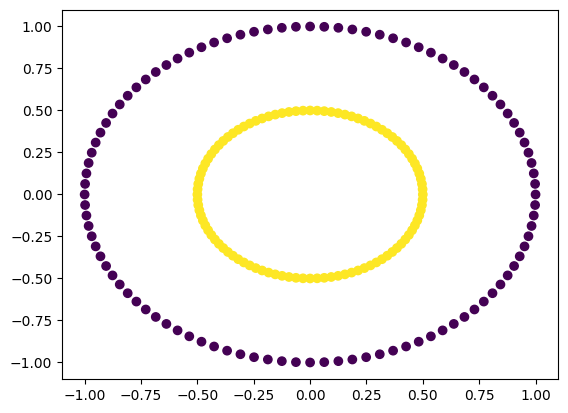

In [11]:
plt.scatter(circX[:,0], circX[:,1], c= circy)
plt.show()

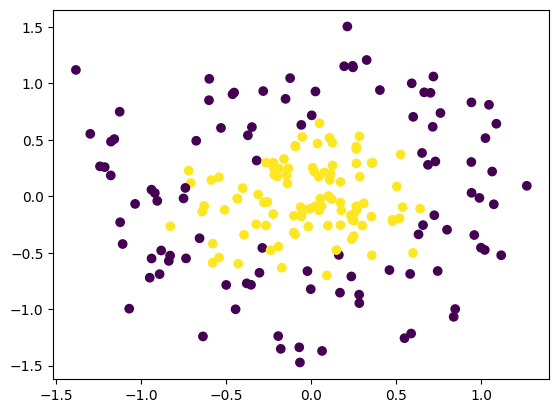

In [19]:
circX, circy = make_circles(200, factor=0.3, noise=0.25)
plt.scatter(circX[:,0], circX[:,1], c= circy)
plt.show()

In [99]:
first = np.random.multivariate_normal([0.8,0.8],[[1,0],[0,1]], 60)
second = np.random.multivariate_normal([-1.8,-1.8],[[1,0],[0,1]], 70)
third = np.random.multivariate_normal([-3.8,-3.8],[[1,0],[0,1]], 70)

In [106]:
num1 = np.append(first, 2*np.ones([60,1],dtype=int), axis=1)
num0 = np.append(second,np.ones([70,1],dtype=int), axis=1)
numn = np.append(third,np.zeros([70,1],dtype=int), axis=1)

In [107]:
traindata = np.vstack((num1,num0, numn))

In [108]:
np.random.shuffle(traindata)

In [109]:
traindata[:20,:]

array([[-4.84710441, -3.64055368,  0.        ],
       [ 1.23565217,  0.96237703,  2.        ],
       [-0.75592686, -0.94867577,  1.        ],
       [-2.7331242 , -5.20533774,  0.        ],
       [ 1.73697872, -1.63396011,  2.        ],
       [-2.96027722, -3.14267354,  1.        ],
       [-4.22182722, -3.70755293,  0.        ],
       [-1.70358663, -0.24709329,  1.        ],
       [-1.41691365, -2.4440247 ,  1.        ],
       [ 0.31804401,  0.9755292 ,  2.        ],
       [ 1.15539568,  0.26838427,  2.        ],
       [-0.60561884,  1.11879295,  2.        ],
       [-3.44212782, -4.15798603,  0.        ],
       [-0.70619331,  2.75245325,  2.        ],
       [-2.95132649, -3.60892933,  0.        ],
       [-1.29612055, -2.59418266,  1.        ],
       [ 0.93852698, -1.99014609,  1.        ],
       [ 1.99089432, -0.32313363,  2.        ],
       [ 0.91049024,  2.15641077,  2.        ],
       [-4.007742  , -4.40811431,  0.        ]])

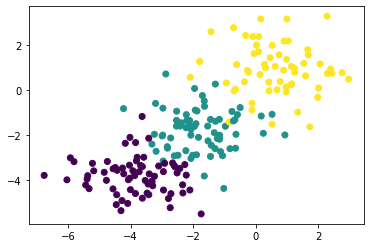

In [110]:
plt.scatter(traindata[:,0], traindata[:,1], c = traindata[:,2])
plt.show()

In [111]:
np.savetxt("01-25prob2.csv",traindata,delimiter=",")

In [112]:
traindata[:,2]

array([0., 2., 1., 0., 2., 1., 0., 1., 1., 2., 2., 2., 0., 2., 0., 1., 1.,
       2., 2., 0., 0., 1., 1., 1., 2., 0., 0., 1., 1., 2., 2., 1., 0., 2.,
       1., 0., 2., 0., 0., 2., 1., 0., 0., 0., 2., 1., 1., 1., 0., 1., 2.,
       1., 0., 0., 2., 2., 0., 2., 1., 1., 2., 2., 2., 0., 1., 0., 1., 2.,
       2., 2., 1., 0., 2., 1., 0., 2., 0., 0., 2., 2., 0., 0., 1., 0., 0.,
       0., 1., 2., 2., 0., 1., 2., 0., 0., 0., 1., 0., 0., 1., 0., 2., 1.,
       1., 0., 2., 0., 2., 1., 1., 2., 1., 0., 1., 0., 1., 0., 1., 1., 2.,
       1., 2., 0., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 0., 2., 1., 2.,
       0., 2., 0., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 0., 2., 0., 1.,
       0., 1., 1., 1., 0., 0., 2., 0., 2., 1., 1., 1., 1., 0., 1., 2., 2.,
       0., 0., 2., 2., 0., 0., 0., 2., 2., 0., 0., 1., 1., 0., 0., 2., 2.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.])

In [119]:
mydata02 = traindata[ (traindata[:,2] > 1) | (traindata[:,2] < 1)]

In [124]:
mydatan02 =  traindata[ (traindata[:,2] == 1)]

In [125]:
mydata02.shape

(130, 3)

In [126]:
mydatan02.shape

(70, 3)

# A Multiclass classifier #

2. Until now, we have only dealt with *binary* (0,1) classifiers--where there are only two classes and the classifier needs to distinguish between them.  However, plenty of categorical data has more than one class.  Classifiers for these  are known as 'multiclass' classifiers.
  
   Most SKLearn classifiers have multiclass capabilities built-in, but the goal of this problem is to build a multiclass logistic regression classifier for categorical data with *three* classes (0,1,2) using  the existing [SKLearn LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  The idea is to create three classifiers using LogisticRegression--one for 0 vs {1,2}, one for 1 vs {0,2}, and one for 2 vs {0,1}.

In [5]:
import numpy as np

In [44]:
test = np.random.randint(0,6000,200)

In [45]:
test[1]

5443

In [46]:
newX = myX[test,:]

In [47]:
newy = myy[test]

In [48]:
newX.shape

(200, 784)

In [49]:
newy.shape

(200,)

In [38]:
from sklearn.svm import SVC 

In [39]:
mysvc = SVC()

In [50]:
mymodel = mysvc.fit(newX, newy)

In [51]:
mypre = mymodel.predict(newX)

In [42]:
newy

array([0, 2, 4, 3, 4, 4, 8, 1, 1, 2, 8, 8, 9, 7, 4, 7, 3, 5, 6, 1, 8, 5,
       7, 1, 5, 9, 6, 4, 6, 7, 7, 0, 9, 2, 2, 1, 6, 7, 8, 2, 4, 0, 3, 4,
       0, 7, 1, 2, 5, 1, 6, 5, 4, 7, 7, 7, 8, 7, 3, 7, 2, 7, 6, 6, 7, 2,
       9, 2, 8, 9, 8, 8, 9, 7, 6, 6, 2, 1, 6, 1, 3, 3, 2, 7, 3, 6, 0, 7,
       7, 8, 8, 6, 4, 0, 0, 1, 0, 5, 7, 7, 9, 1, 1, 7, 7, 1, 7, 3, 4, 9,
       0, 2, 0, 6, 9, 5, 9, 7, 1, 4, 5, 4, 9, 3, 0, 3, 0, 2, 4, 1, 5, 8,
       2, 4, 7, 1, 4, 5, 1, 2, 2, 5, 4, 9, 2, 2, 7, 0, 1, 3], dtype=uint8)

In [52]:
accuracy_score(mypre, newy)

0.86

In [20]:
from sklearn.metrics import accuracy_score

In [18]:
myimg[0].shape

(784,)

In [9]:
import matplotlib.pyplot as plt

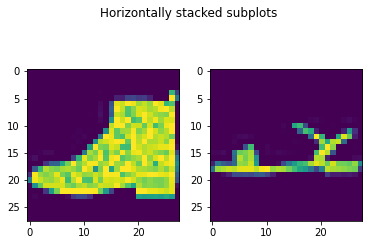

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Horizontally stacked subplots')
ax1.imshow(myX[test[0]].reshape(28,28))
ax2.imshow(myX[test[1]].reshape(28,28))
plt.show()

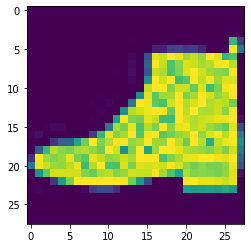

In [27]:
plt.imshow(myX[test[0]].reshape(28,28))

In [133]:
myX.shape

(60000, 784)

In [134]:
import matplotlib.pyplot as plt

In [135]:
myX[5].shape

(784,)

In [ ]:
plt.imshow(myX[9].reshape(28,28), c="grey")

In [1]:
1+1

2